En este notebook se compararan los resultados de MAE entre las dos versiones.

In [7]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

La configuracion elegida de la version 1:

In [8]:
modelversion1 = keras.Sequential()


"se crea la red de neuronas que se va a utilizar con tantas neuronas en la capa de entrada como grande sea el tablero"
modelversion1.add(keras.Input(shape=(64,)))
modelversion1.add(Dense(64, activation='relu'))
modelversion1.add(Dense(64, activation='relu'))
modelversion1.add(Dense(64, activation='relu'))
modelversion1.add(Dense(64, activation='relu'))
modelversion1.add(Dense(16, activation='relu'))
modelversion1.add(Dense(8, activation='relu'))
"queremos que la salida sean dos(fila y columna) y con funcion de activacion relu para sacar numeros enteros enteros positivos"
modelversion1.add(Dense(2, activation='relu'))
modelversion1.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
print(modelversion1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 16)                1040      
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 2)                

La configuracion elegida de la version 2:

In [9]:
"se crea la red de neuronas que se va a utilizar con tantas neuronas en la capa de entrada como grande sea el tablero"
modelx = keras.Sequential()
modelx.add(keras.Input(shape=(64,)))
modelx.add(Dense(64, activation='relu'))
modelx.add(Dense(64, activation='relu'))
modelx.add(Dense(16, activation='relu'))
modelx.add(Dense(8, activation='relu'))
"queremos que la salida sean dos(fila y columna) y con funcion de activacion relu para sacar numeros enteros enteros positivos"
modelx.add(Dense(1, activation='relu'))
modelx.compile(loss='mae', optimizer=Adam(learning_rate=0.0001), metrics=['mae'])
print(modelx.summary())

modely = keras.Sequential()
modely.add(keras.Input(shape=(64,)))
modely.add(Dense(64, activation='relu'))
modely.add(Dense(64, activation='relu'))
modely.add(Dense(16, activation='relu'))
modely.add(Dense(8, activation='relu'))
"queremos que la salida sean dos(fila y columna) y con funcion de activacion relu para sacar numeros enteros enteros positivos"
modely.add(Dense(1, activation='relu'))
modely.compile(loss='mae', optimizer=Adam(learning_rate=0.0001), metrics=['mae'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9505 (37.13 KB)
Trainable params: 9505 (37.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Funciones creadas para unificar las los redes de neuronas de la version 2:

In [10]:
def modelversion2_train(board,resultados):
  resultadosx=resultados[:,0]
  resultadosy=resultados[:,1]
  historyx = modelx.fit(board,resultadosx,epochs=100, verbose = 0, validation_split=0.33,batch_size=10)
  historyy = modely.fit(board,resultadosy,epochs=100, verbose = 0, validation_split=0.33,batch_size=10)
  return (historyx,historyy)

def modelversion2_predict(board):
  return(np.concatenate((modelx.predict(board), modely.predict(board)), axis=1))


Carga del tablero. Se hace un remplazo de los 2 por 1 de tal forma que los modelos interpreten las casillas como ocupadas en vez de pertenecer a un jugador para facilitar el aprendizaje. Las redes de neuronas tienen problemas al manejar variables categoricas adaptadas como numeros enteros y por lo tanto esta transfotmacion es necesaria:

In [11]:
" cargamos tablero"
df = pd.read_csv('partidas.csv')
"separamos tablero de resultados"
resultados = df.iloc[:,[0,1]]
board = df.iloc[:,2:]
board = board.replace(2,1)
print(board.head())
print(resultados.head())

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.54  0.55  0.56  \
0  0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
1  0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
2  0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
3  0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
4  0    0    0    0    0    0    0    0    0    0  ...     0     0     0   

   0.57  0.58  0.59  0.60  0.61  0.62  0.63  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0  

[5 rows x 64 columns]
   4  3
0  5  3
1  5  2
2  6  2
3  6  1
4  7  0


division en datos de training y test:

In [12]:
"sacamos datos de entrenamiento"
X_train, X_test, y_train, y_test = train_test_split(board, resultados, test_size=0.9)

Data Augmentation basado en rotar el tablero y normalizacion:

In [13]:
# Aumentar los datos con rotaciones y reflexiones
def augment_data(X, y):
    augmented_X = []
    augmented_y = []
    for i in range(len(X)):
        augmented_X.append(X.iloc[i])
        augmented_y.append(y.iloc[i])
        rotated_board = np.rot90(X.iloc[i].values.reshape(8, 8)).flatten()
        augmented_X.append(rotated_board)
        augmented_y.append(y.iloc[i])
    return np.array(augmented_X), np.array(augmented_y)

X_train_augmented, y_train = augment_data(X_train, y_train)

# Normalización
X_train = X_train_augmented / 1.0
X_test = X_test / 1.0


Entrenamiento version 1:

In [14]:
"entrenamos"
historyv1 = modelversion1.fit(X_train,y_train,epochs=100, verbose = 0,validation_split=0.33,batch_size=10)

Resultados de MAE de version 1:

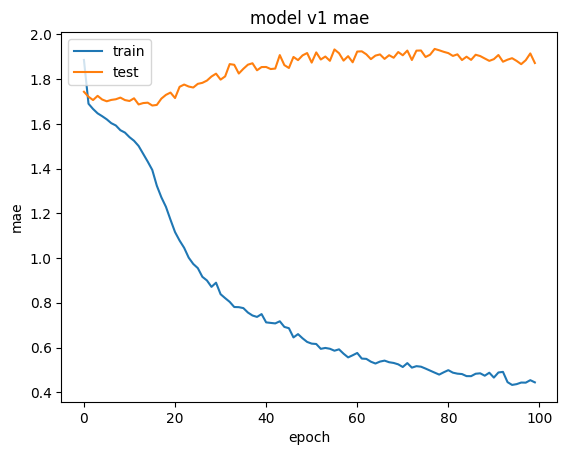

In [15]:
plt.plot(historyv1.history['mae'])
plt.plot(historyv1.history['val_mae'])
plt.title('model v1 mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Entrenamiento version 2

In [16]:
historyv2 =  modelversion2_train(X_train,y_train)

Resultados de MAE de version 2:

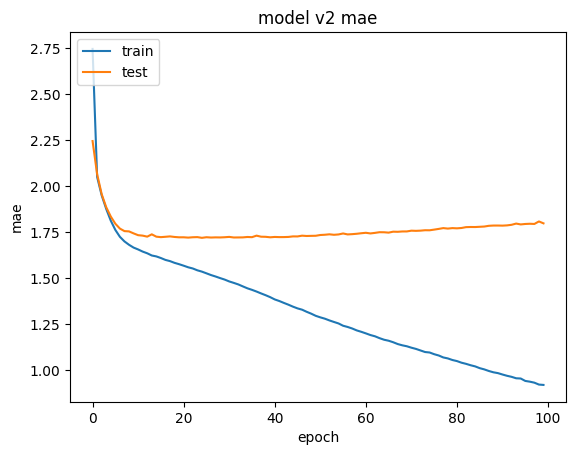

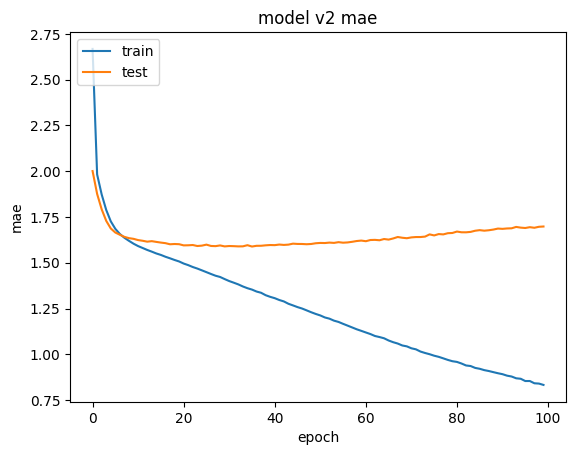

In [17]:
plt.plot(historyv2[0].history['mae'])
plt.plot(historyv2[0].history['val_mae'])
plt.title('model v2 mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historyv2[1].history['mae'])
plt.plot(historyv2[1].history['val_mae'])
plt.title('model v2 mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Comparacion MAE entre versiones:

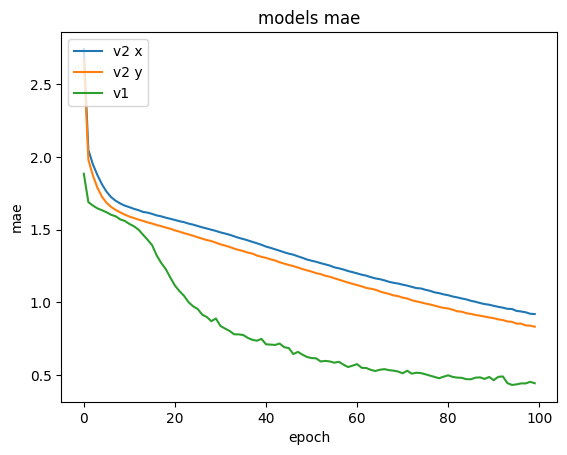

In [18]:
plt.plot(historyv2[0].history['mae'])
plt.plot(historyv2[1].history['mae'])
plt.plot(historyv1.history['mae'])
plt.title('models mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['v2 x', 'v2 y','v1'], loc='upper left')
plt.show()

Comparación MAE entre versiones con datos de validacion:

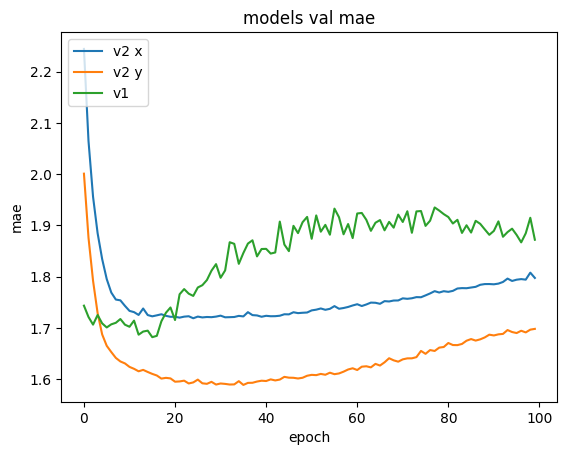

In [19]:
plt.plot(historyv2[0].history['val_mae'])
plt.plot(historyv2[1].history['val_mae'])
plt.plot(historyv1.history['val_mae'])
plt.title('models val mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['v2 x', 'v2 y','v1'], loc='upper left')
plt.show()